# Hand signs classification

Architecture LeNet5

- image of a hand, representing one of the numbers (0,1,2,3,4,5) using fingures
- target value: each image is labeled with one of the numbers (0,1,..,5) using one hot vector

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.


number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)

example target vector:[0. 0. 0. 0. 0. 1.]


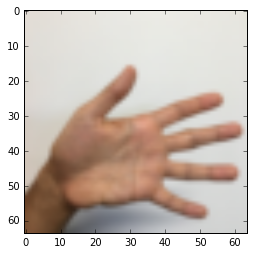

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ('')
print("example target vector:"+str(Y_train[0]))
imshow(X_train[0,:,:,:])

In [3]:
def Lenet5Model(input_shape,classes):
    """
    Implementation of the Lenet5.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)
    ######### 1st Layer #######
    X = Conv2D(6, (5, 5), strides = (1, 1), name = 'conv1')(X_input)
    X = Activation('relu')(X)
    X = AveragePooling2D((2, 2),(2,2), name='avg_pool1')(X)
    ######## 2nd layer #########
    X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = Activation('relu')(X)
    X = AveragePooling2D((2, 2),(2,2), name='avg_pool2')(X)
    ######## Fully connected layers ###########
    X = Flatten()(X)
    X = Dense(120, activation='tanh', name='fc1')(X)
    X = Dense(84, activation='tanh', name='fc2')(X)
    X = Dense(classes, activation='softmax', name='softmax-' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)

    model = Model(inputs = X_input, outputs = X, name='LeNet5')
    return model

In [4]:
model = Lenet5Model(input_shape = (64, 64, 3), classes = 6)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(X_train, Y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1080/1080 [==============================] - 5s 5ms/step - loss: 1.7103 - acc: 0.3037
Epoch 2/50
1080/1080 [==============================] - 5s 5ms/step - loss: 1.0653 - acc: 0.6083
Epoch 3/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.7366 - acc: 0.7574
Epoch 4/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.5598 - acc: 0.8241
Epoch 5/50
1080/1080 [==============================] - 5s 4ms/step - loss: 0.4013 - acc: 0.8769
Epoch 6/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.3169 - acc: 0.9019
Epoch 7/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.2274 - acc: 0.9352
Epoch 8/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.1831 - acc: 0.9435
Epoch 9/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.1451 - acc: 0.9648
Epoch 10/50
1080/1080 [==============================] - 5s 5ms/step - loss: 0.1347 - acc: 0.9639
Epoch 11/50
1080/1080 [======

In [10]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

120/120 [==============================] - 0s 3ms/step
Loss = 0.2955036237835884
Test Accuracy = 0.925000003973643


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 6)         0         
_________________________________________________________________
avg_pool1 (AveragePooling2D) (None, 30, 30, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 26, 26, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
avg_pool2 (AveragePooling2D) (None, 13, 13, 16)        0         
__________

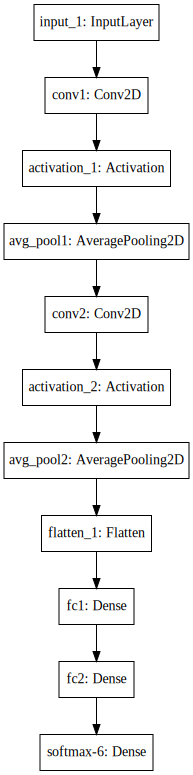

In [9]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))